In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np 
from sklearn.preprocessing import MinMaxScaler


/home/etudiant/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
## path file result
str_filename="bigdatapr.csv"

# Open the file and check header

In [3]:
fh=open(str_filename)
csv_reader=csv.reader(fh)
csv_header=next(csv_reader)
csv_header


['EPOCHS',
 'BATCH',
 'ACCURACY',
 'VAL_ACCURACY',
 'LOSS',
 'VAL_LOSS',
 'ROC',
 'PR',
 'VAL_ROC',
 'VAL_PR',
 'PRECISION',
 'RECALL',
 'VAL_PRECISION',
 'VAL_RECALL',
 'BIN_ACC',
 'VAL_BIN_ACC',
 'LR']

# Visualize the file

In [4]:
df_sig=pd.read_csv(str_filename,names=csv_header,header=0)
df_sig

,EPOCHS,BATCH,ACCURACY,VAL_ACCURACY,LOSS,VAL_LOSS,ROC,PR,VAL_ROC,VAL_PR,PRECISION,RECALL,VAL_PRECISION,VAL_RECALL,BIN_ACC,VAL_BIN_ACC,LR
0,0,64,0.669577,0.240023,0.001187,0.001602,0.725125,0.708726,0.214881,0.352553,0.669584,0.669584,0.240024,0.240024,0.669577,0.240023,1.000000e-04
1,1,64,0.686150,0.257867,0.001151,0.001594,0.746825,0.732540,0.231311,0.357826,0.686157,0.686157,0.257867,0.257867,0.686150,0.257867,1.000000e-04
2,2,64,0.691782,0.244674,0.001139,0.001662,0.753725,0.740020,0.214447,0.351699,0.691787,0.691787,0.244674,0.244674,0.691782,0.244674,1.000000e-04
3,3,64,0.699809,0.298038,0.001120,0.001634,0.764601,0.751218,0.283967,0.383284,0.699812,0.699812,0.298038,0.298038,0.699809,0.298038,2.000000e-05
4,4,64,0.702667,0.304313,0.001114,0.001633,0.768258,0.754710,0.289688,0.385510,0.702674,0.702674,0.304313,0.304313,0.702667,0.304313,2.000000e-05
5,5,64,0.703936,0.360275,0.001110,0.001565,0.770186,0.756903,0.354488,0.421391,0.703943,0.703943,0.360276,0.360276,0.703936,0.360275,4.000000e-06
6,6,64,0.705151,0.362232,0.001108,0.001562,0.771434,0.757877,0.356430,0.422294,0.705156,0.705156,0.362232,0.362232,0.705151,0.362232,4.000000e-06
7,7,64,0.705495,0.360760,0.001107,0.001570,0.772280,0.758909,0.353666,0.420446,0.705503,0.705503,0.360760,0.360760,0.705495,0.360760,8.000000e-07
8,8,64,0.705883,0.362217,0.001106,0.001570,0.772578,0.759129,0.355788,0.421792,0.705887,0.705887,0.362217,0.362217,0.705883,0.362217,8.000000e-07
9,9,64,0.707505,0.355501,0.001105,0.001584,0.773291,0.759739,0.347718,0.417279,0.707512,0.707512,0.355501,0.355501,0.707505,0.355501,1.600000e-07


# LOSS & ACCURACY

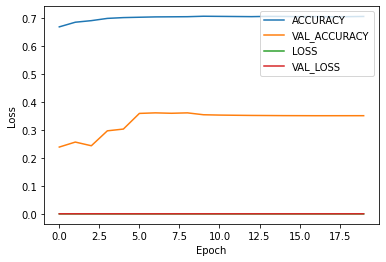

In [5]:
plt.plot(df_sig['ACCURACY'])
plt.plot(df_sig['VAL_ACCURACY'])
plt.plot(df_sig['LOSS'])
plt.plot(df_sig['VAL_LOSS'])
plt.legend(['ACCURACY','VAL_ACCURACY','LOSS','VAL_LOSS'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# LOSS ONLY

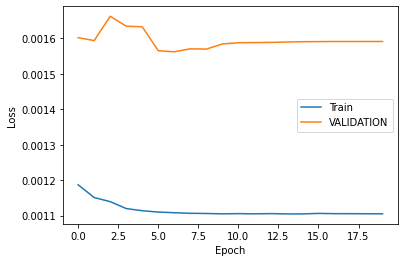

In [6]:
plt.plot(df_sig['LOSS'])
plt.plot(df_sig['VAL_LOSS'])
plt.legend(['Train','VALIDATION'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Others metrics

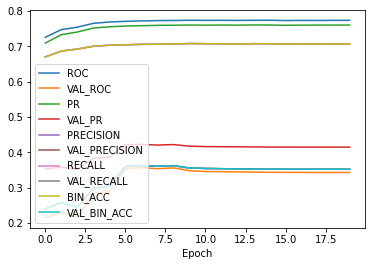

In [7]:
plt.plot(df_sig['ROC'])
plt.plot(df_sig['VAL_ROC'])
plt.plot(df_sig['PR'])
plt.plot(df_sig['VAL_PR'])


plt.plot(df_sig['PRECISION'])
plt.plot(df_sig['VAL_PRECISION'])
plt.plot(df_sig['RECALL'])
plt.plot(df_sig['VAL_RECALL'])
plt.plot(df_sig['BIN_ACC'])
plt.plot(df_sig['VAL_BIN_ACC'])


plt.legend(['ROC','VAL_ROC','PR','VAL_PR','PRECISION','VAL_PRECISION','RECALL','VAL_RECALL','BIN_ACC','VAL_BIN_ACC'])
plt.xlabel('Epoch')
plt.show()

## Confusion Matrix for train set 

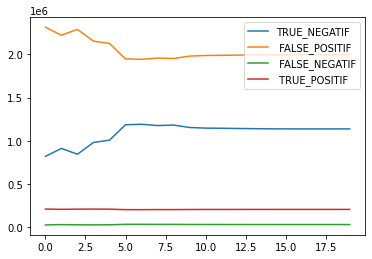

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       0.000000        1.000000        0.000000       1.000000
1       0.247280        0.752720        0.501999       0.498001
2       0.066074        0.933926        0.158383       0.841617
3       0.432914        0.567086        0.086690       0.913310
4       0.504675        0.495325        0.202942       0.797058
5       0.985923        0.014077        0.981862       0.018138
6       1.000000        0.000000        1.000000       0.000000
7       0.960209        0.039791        0.888460       0.111540
8       0.975889        0.024111        0.907883       0.092117
9       0.900384        0.099616        0.739503       0.260497
10      0.880680        0.119320        0.701085       0.298915
11      0.876258        0.123742        0.687803       0.312197
12      0.868966        0.131034        0.668523       0.331477
13      0.863271        0.136729        0.653242       0.346758
14      0.857848        0.142152        

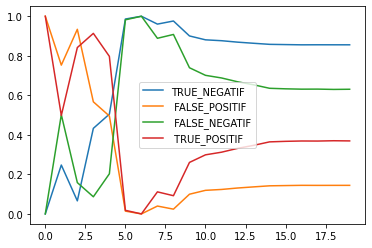

In [8]:
df = pd.read_csv("bigdata.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38])
fig = df.plot()
plt.show()
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)
fig2 = normalized_df.plot()
plt.show()

## Confusion Matrix for Validation set 

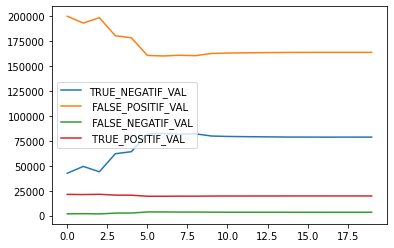

    TRUE_NEGATIF   FALSE_POSITIF   FALSE_NEGATIF   TRUE_POSITIF
0       0.000000        1.000000        0.033571       0.966429
1       0.172074        0.827926        0.127162       0.872838
2       0.036830        0.963170        0.000000       1.000000
3       0.491168        0.508832        0.419125       0.580875
4       0.542380        0.457620        0.462360       0.537640
5       0.986521        0.013479        0.987284       0.012716
6       1.000000        0.000000        1.000000       0.000000
7       0.981209        0.018791        0.939980       0.060020
8       0.992759        0.007241        0.953713       0.046287
9       0.937038        0.062962        0.893693       0.106307
10      0.926390        0.073610        0.864191       0.135809
11      0.921529        0.078471        0.862665       0.137335
12      0.917145        0.082855        0.861139       0.138861
13      0.913787        0.086213        0.852492       0.147508
14      0.910079        0.089921        

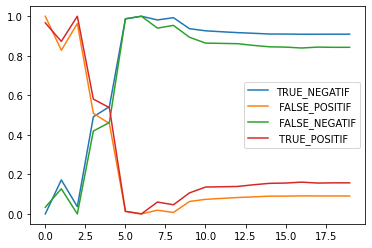

In [9]:
df_val = pd.read_csv("bigdata_val.csv",skiprows=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38])
fig_val = df_val.plot()
plt.show()
normalized_data_val = scaler.fit_transform(df_val)
normalized_df_val = pd.DataFrame(normalized_data_val, columns=df.columns)
print(normalized_df_val)
fig2 = normalized_df_val.plot()
plt.show()